In [1]:
import pandas as pd
import numpy as np

In [2]:
age = [22,25,47,52,46,56,55,60,62,61,18,28,27]
affordabilty = [1,0,1,0,1,1,0,0,1,1,1,1,0]
hi= [0,0,1,0,1,1,0,1,1,1,0,0,1]

In [16]:
csv = [[22,1,0],
[25,0,0],
[47,1,1],
[52,0,0],
[46,1,1],
[56,1,1],
[55,0,0],
[60,0,1],
[62,1,1],
[61,1,1],
[18,1,0],
[28,1,0],
[27,0,0],
[29,0,0],
[49,1,1],
[55,1,1],
[25,0,1],
[58,1,1],
[19,0,0],
[18,1,0],
[21,1,0],
[26,0,0],
[40,1,1],
[45,1,1],
[50,1,1],
[54,1,1],
[23,1,0],
[46,1,0]]

In [19]:
df = pd.DataFrame(csv, columns = ['age','affordabilty','hi'])

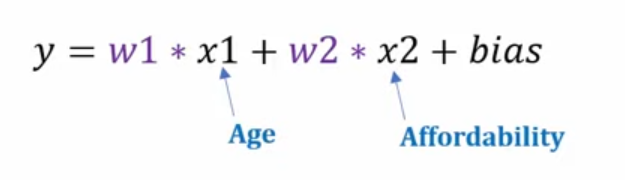

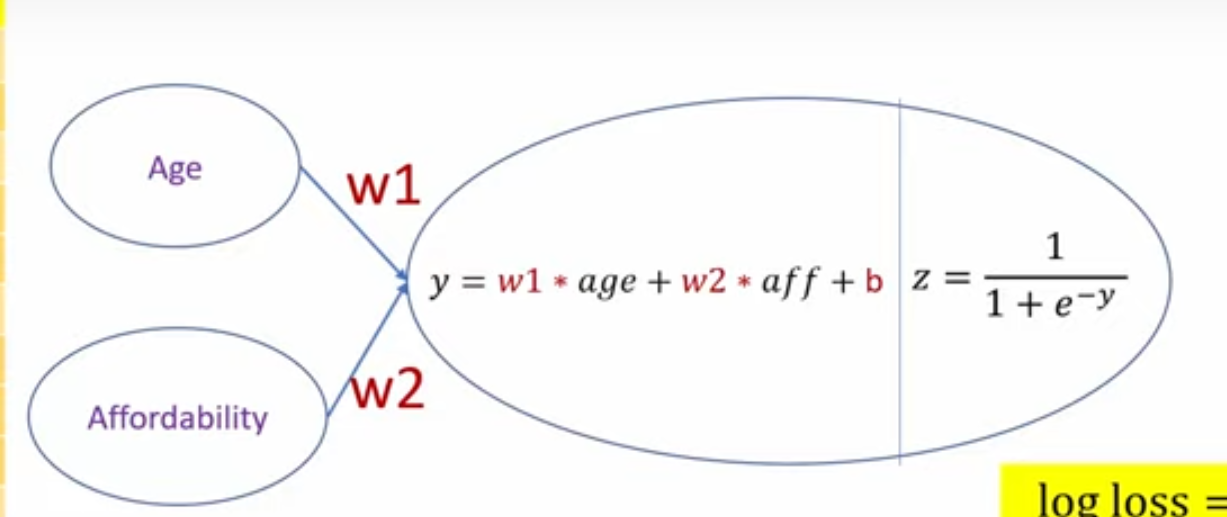

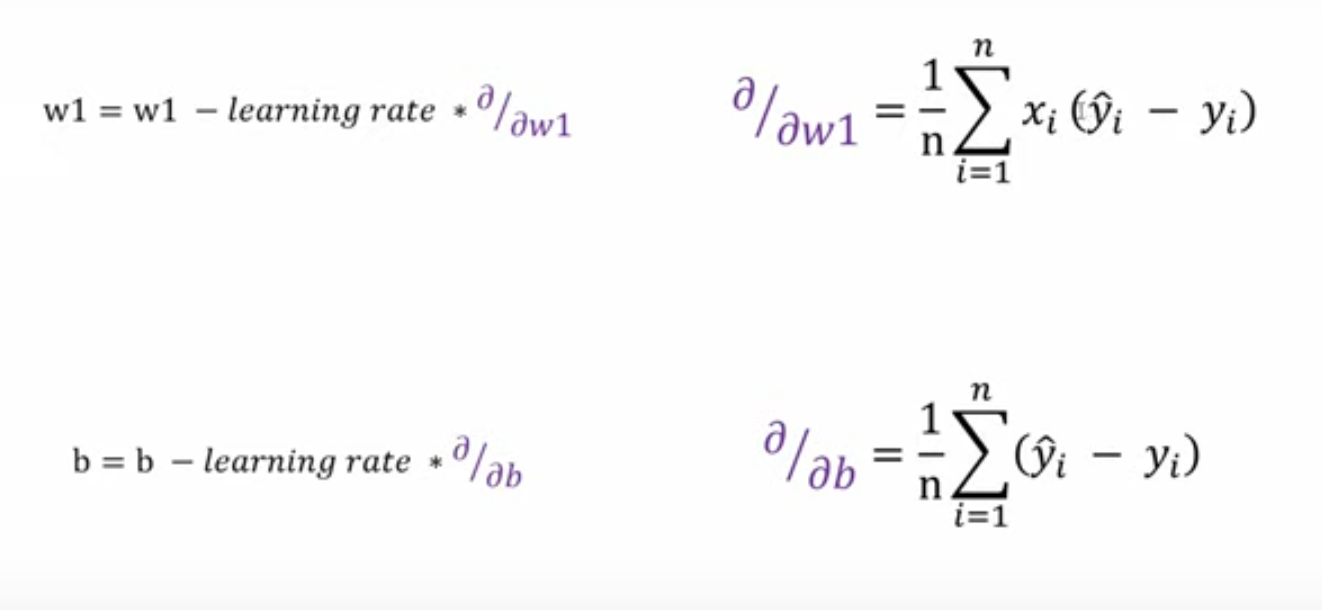

In [23]:
X = df.iloc[:,:-1]

In [52]:
y = df.iloc[:,-1]

In [53]:
y

0     0
1     0
2     1
3     0
4     1
5     1
6     0
7     1
8     1
9     1
10    0
11    0
12    0
13    0
14    1
15    1
16    1
17    1
18    0
19    0
20    0
21    0
22    1
23    1
24    1
25    1
26    0
27    0
Name: hi, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split

In [54]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=25)

In [55]:
X_train_scaled = X_train.copy()
X_train_scaled['age'] = X_train_scaled['age']/100

X_test_scaled = X_test.copy()
X_test_scaled['age'] = X_test_scaled['age']/100

In [56]:
from tensorflow import keras

In [57]:
from tensorflow.python import metrics
model = keras.Sequential([
    keras.layers.Dense(1,input_shape=(2,),activation = 'sigmoid', kernel_initializer = 'ones', bias_initializer = 'zeros' )
])

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train_scaled, y_train, epochs = 5000)

In [ ]:
model.evaluate(X_test_scaled,y_test)

In [60]:
y_pred = model.predict(X_test_scaled)

1/1 [==============================] - 0s 43ms/step


In [84]:
def rounded(f):
    if f >= 0.5:
      return 1
    else:
      return 0

In [85]:
y_pred_rounded = [rounded(i) for i in y_pred]

In [86]:
y_pred_rounded

[1, 0, 0, 0, 1, 1]

In [63]:
results= pd.DataFrame(zip(y_test.values,y_pred_rounded),columns= ['y_test','y_pred'])
results

,y_test,y_pred
0,1,1
1,0,0
2,0,0
3,0,0
4,1,1
5,1,1


In [64]:
coef,intercept = model.get_weights()

In [65]:
coef

array([[5.0608673],
       [1.4086503]], dtype=float32)

In [66]:
intercept

array([-2.913703], dtype=float32)

In [67]:
def sigmoid(x):
  import math
  return 1 / (1 + math.exp(- x))

In [87]:
def prediction_function(age,aff):
  weighted_sum = np.dot([age,aff],coef) + intercept
  return rounded(sigmoid(weighted_sum))

In [72]:
X_train_scaled[:5]

,age,affordabilty
0,0.22,1
13,0.29,0
6,0.55,0
17,0.58,1
24,0.50,1


In [73]:
y_train[:5]

0     0
13    0
6     0
17    1
24    1
Name: hi, dtype: int64

In [90]:
prediction_function(0.50,1)

1

In [91]:
def log_loss(y_true, y_pred):
  epsilon = 1e-15
  y_pred_new = [max(i,epsilon) for i in y_pred]
  y_pred_new = [min(i,1-epsilon) for i in y_pred_new]
  y_pred_new = np.array(y_pred_new)
  return -np.mean(y_true*np.log(y_pred_new)+ (1-y_true)*np.log(1-y_pred_new))

In [92]:
def sigmoid_numpy(X):
  return 1/ (1+np.exp(-X))

In [93]:
sigmoid_numpy(np.array([13,0,1]))

array([0.99999774, 0.5       , 0.73105858])

In [94]:
def gradient_descent(age,aff,y_true,epochs, loss_thresold):
    w1 = w2 = 1
    bias = 0
    rate = 0.1
    n = len(age)
    for i in range(epochs):
        weighted_sum = w1 * age + w2 * aff + bias
        y_predicted = sigmoid_numpy(weighted_sum)
        loss = log_loss(y_true, y_predicted)

        w1d = (1/n)*np.dot(np.transpose(age),(y_predicted-y_true)) 
        w2d = (1/n)*np.dot(np.transpose(aff),(y_predicted-y_true)) 

        bias_d = np.mean(y_predicted-y_true)
        w1 = w1 - rate * w1d
        w2 = w2 - rate * w2d
        bias = bias - rate * bias_d

        print (f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')

        if loss<=loss_thresold:
            break

    return w1, w2, bias

In [101]:
gradient_descent(X_train_scaled['age'],X_train_scaled['affordabilty'],y_train,10000, 0.4631)

Epoch:0, w1:0.9949815266940354, w2:0.9896696250789058, bias:-0.022683735472737165, loss:0.7113403233723417
Epoch:1, w1:0.9901881586576409, w2:0.9796919358626917, bias:-0.0448000095819568, loss:0.7049637757302932
Epoch:2, w1:0.9856170061412965, w2:0.9700638985605008, bias:-0.06635668147055854, loss:0.6989316069171762
Epoch:3, w1:0.9812649499868824, w2:0.9607819898550239, bias:-0.08736214282601446, loss:0.6932296440186102
Epoch:4, w1:0.9771286604394739, w2:0.9518422282489621, bias:-0.10782527044492787, loss:0.6878437615034732
Epoch:5, w1:0.9732046162237376, w2:0.9432402067089257, bias:-0.12775537848381535, loss:0.6827599423171782
Epoch:6, w1:0.9694891236927057, w2:0.9349711261899014, bias:-0.1471621708479477, loss:0.6779643338517055
Epoch:7, w1:0.9659783358712691, w2:0.9270298296469525, bias:-0.1660556941316855, loss:0.6734432985751392
Epoch:8, w1:0.9626682712330876, w2:0.9194108361694034, bias:-0.184446291481677, loss:0.6691834592087409
Epoch:9, w1:0.9595548320671853, w2:0.9121083749050

(5.036910425410707, 1.4564630137800754, -2.953436064358123)

In [110]:
class myNN:
  def __init__(self):
    self.w1 = 1
    self.w2 = 1
    self.bias = 0

  def fit(self, X,y, epochs, loss_threshold):
        self.w1 ,self.w2, self.bias = self.gradient_descent(X['age'], X['affordabilty'], y,epochs, loss_threshold)

  def predict(self, X_test):
    weighted_sum = self.w1*X_test['age'] + self.w2*X_test['affordabilty'] + self.bias
    return sigmoid_numpy(weighted_sum)

  def gradient_descent(self,age,aff,y_true,epochs, loss_thresold):
    w1 = w2 = 1
    bias = 0
    rate = 0.1
    n = len(age)
    for i in range(epochs):
        weighted_sum = w1 * age + w2 * aff + bias
        y_predicted = sigmoid_numpy(weighted_sum)
        loss = log_loss(y_true, y_predicted)

        w1d = (1/n)*np.dot(np.transpose(age),(y_predicted-y_true)) 
        w2d = (1/n)*np.dot(np.transpose(aff),(y_predicted-y_true)) 

        bias_d = np.mean(y_predicted-y_true)
        w1 = w1 - rate * w1d
        w2 = w2 - rate * w2d
        bias = bias - rate * bias_d

        if i%50 == 0:
           print (f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')

        if loss<=loss_thresold:
          print (f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')
          break

    return w1, w2, bias

In [111]:
customModel = myNN()
customModel.fit(X_train_scaled,y_train, epochs=10000, loss_threshold=0.4631)

Epoch:0, w1:0.9949815266940354, w2:0.9896696250789058, bias:-0.022683735472737165, loss:0.7113403233723417
Epoch:50, w1:0.9500930885415674, w2:0.804909020986925, bias:-0.6409684073086737, loss:0.605840882528726
Epoch:100, w1:1.0651807066987198, w2:0.8712141663478571, bias:-0.8544393593687205, loss:0.5925483296513601
Epoch:150, w1:1.2051066705614086, w2:0.9595761602192402, bias:-0.994388310973579, loss:0.5831116696004638
Epoch:200, w1:1.348404774050644, w2:1.0368550412385873, bias:-1.1137591957694988, loss:0.5749386575004722
Epoch:250, w1:1.4916724882233876, w2:1.1011257122864226, bias:-1.2215953578871015, loss:0.5676659367618607
Epoch:300, w1:1.6340903405280722, w2:1.1542608622990649, bias:-1.3205556736951605, loss:0.5610743352916638
Epoch:350, w1:1.7752701340123371, w2:1.1982396875981078, bias:-1.4121465205758779, loss:0.5550143595663022
Epoch:400, w1:1.9149428112920845, w2:1.2347246766848714, bias:-1.4975008606348643, loss:0.5493822089005881
Epoch:450, w1:2.052903095020176, w2:1.2650

In [112]:
customModel.predict(X_test_scaled)

2     0.704824
10    0.356559
21    0.161943
11    0.478354
14    0.725341
9     0.828572
dtype: float64

In [113]:
model.predict(X_test_scaled)

1/1 [==============================] - 0s 25ms/step


array([[0.7054848 ],
       [0.35569543],
       [0.16827847],
       [0.47801173],
       [0.72606975],
       [0.8294984 ]], dtype=float32)